In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import joblib

In [12]:
df = pd.read_csv(r"C:\Users\STUDENT\Downloads\DATASETS\SALARY\ds_salaries.csv")
print(df.head())

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

In [13]:
exp_map = {"EN": "Entry Level", "MI": "Mid Level", "SE": "Senior Level", "EX": "Executive Level"}
emp_map = {"FT": "Full Time", "PT": "Part Time", "CT": "Contract", "FL": "Freelance"}
employ_map = {"AE" : "United Arab Emirates", "AR" : "Argentina", "AT" : "Austria", "AU" : "Australia", "BE" : "Belgium", "BG" : "Bulgaria", "BO" : "Bolivia", "BR" : "Brazil", "CA" : "Canada", "CH" : "Switzerland", "CL" : "Chile", "CN": "Canada", "CO" : "Colombia", "CZ" : "Czechia", "DE" : "Germany", "DK" : "Denmark", "DZ" : "Algeria", "EE" : "Estonia", "ES" : "Spain", "FR" : "France", "GB" : "United Kingdom", "GR" : "Greece", "HK" : "Hong Kong", "HN" : "Honduras", "HR" : "Croatia", "HU" : "Hungary", "IE" : "Ireland", "IN" : "India", "IQ" : "Iraq", "IR" : "Iran", "IT" : "Italy", "JE" : "Jersey", "JP" : "Japan", "KE" : "Kenya", "LU" : "Luxembourg", "MD" : "Moldova", "MT" : "Malta", "MX" : "Mexico", "MY" : "Malaysia", "NG" : "Nigeria", "NL" : "Netherlands", "NZ" : "New Zealand", "PH" : "Philippines", "PK" : "Pakistan", "PL" : "Poland", "PR" : "Puerto Rico", "PT" : "Portugal", "RO" : "Romania", "RS" : "Serbia", "RU" : "Russia", "SG" : "Singapore", "SI" : "Slovenia", "TN" : "Tunisia", "TR" : "Turkey", "UA" : "Ukraine", "US" : "United States", "VN" : "Vietnam"}

com_map = {"AE" : "United Arab Emirates", "AS" : "American Samoa", "AT" : "Austria", "AU" : "Australia", "BE" : "Belgium", "BR" : "Brazil", "CA" : "Canada", "CH" : "Switzerland", "CL" : "Chile", "CN" : "China", "CO" : "Colombia", "CZ" : "Czechia", "DE" : "Germany", "DK" : "Denmark", "DZ" : "Algeria", "EE" : "Estonia", "ES" : "Spain", "FR" : "France", "GB" : "United Kingdom", "GR" : "Greece", "HN" : "Honduras", "HR" : "Croatia", "HU" : "Hungary", "IE" : "Ireland", "IL" : "Israel", "IN" : "India", "IQ" : "Iraq", "IR" : "Iran", "IT" : "Italy", "JP" : "Japan", "KE" : "Kenya", "LU" : "Luxembourg", "MD" : "Moldova", "MT" : "Malta", "MX" : "Mexico", "MY" : "Malaysia", "NG" : "Nigeria", "NL" : "Netherlands", "NZ" : "New Zealand", "PK" : "Pakistan", "PL" : "Poland", "PT" : "Portugal", "RO" : "Romania", "RU" : "Russia", "SG" : "Singapore", "SI" : "Slovenia", "TR" : "Turkey", "UA" : "Ukraine", "US" : "United States", "VN" : "Vietnam"}

df["experience_level"] = df["experience_level"].map(exp_map)
df["employment_type"] = df["employment_type"].map(emp_map)
df["employee_residence"] = df["employee_residence"].map(employ_map)
df["company_location"] = df["company_location"].map(com_map)

df = df.drop_duplicates().reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


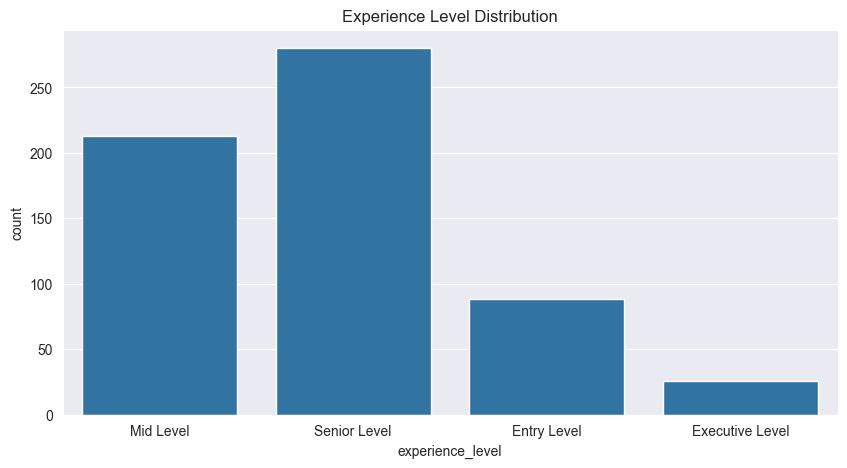

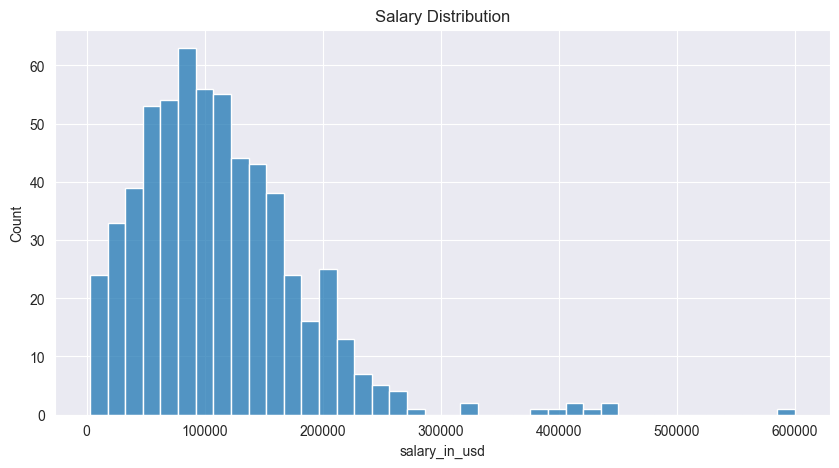

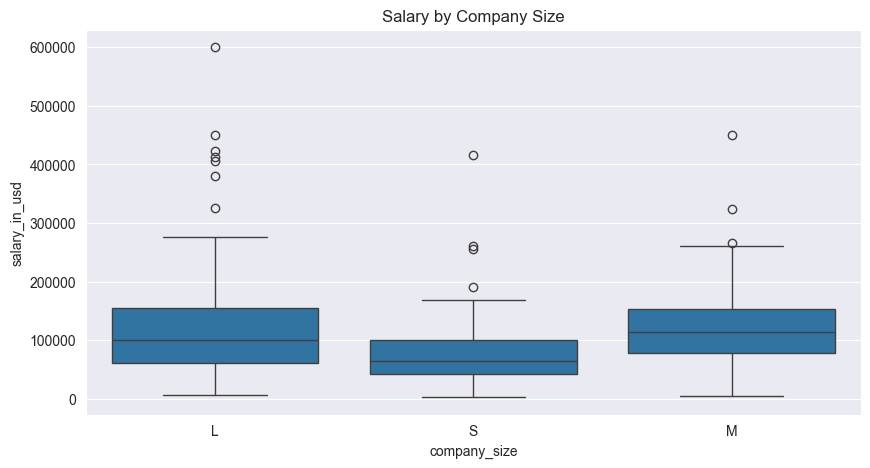

In [14]:
df.info()
df.describe()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="experience_level")
plt.title("Experience Level Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df["salary_in_usd"], bins=40)
plt.title("Salary Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="company_size", y="salary_in_usd")
plt.title("Salary by Company Size")
plt.show()


In [15]:
categorical_features = [
    "experience_level",
    "employment_type",
    "job_title",
    "employee_residence",
    "company_location",
    "company_size"
]

numeric_features = ["remote_ratio"]

target = "salary_in_usd"

print("Categorical Features:", categorical_features)
print("Numeric Features:", numeric_features)

Categorical Features: ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
Numeric Features: ['remote_ratio']


In [16]:
X = df[categorical_features + numeric_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
        ("num", "passthrough", numeric_features),
    ]
)

In [18]:

models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(tree_method="hist", verbosity=0)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} -> MSE: {mse:.2f} | R2: {r2:.4f}")

LinearRegression -> MSE: 3625049649.04 | R2: 0.0541
Lasso -> MSE: 3488809504.88 | R2: 0.0897
Ridge -> MSE: 1804561700.00 | R2: 0.5292
DecisionTree -> MSE: 1985671592.88 | R2: 0.4819


C:\Users\STUDENT\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.777e+09, tolerance: 2.575e+08
  model = cd_fast.enet_coordinate_descent(


RandomForest -> MSE: 1823589811.15 | R2: 0.5242
GradientBoosting -> MSE: 1894437452.60 | R2: 0.5057
AdaBoost -> MSE: 2306966943.69 | R2: 0.3981
SVR -> MSE: 3848934780.52 | R2: -0.0043
KNN -> MSE: 2463727252.76 | R2: 0.3572
XGBoost -> MSE: 1667390208.00 | R2: 0.5649


In [19]:
best_model_name = sorted(results.items(), key=lambda x: x[1]["MSE"])[0][0]
best_model_name

'XGBoost'

In [20]:
best_model = Pipeline([
    ("prep", preprocessor),
    ("model", models[best_model_name])
])

best_model.fit(X, y)
joblib.dump(best_model, "salary_predictor.joblib")

print("Best Model Saved As salary_predictor.joblib")

Best Model Saved As salary_predictor.joblib
